In [1]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data_dir = '/content/drive/MyDrive/archive (1)/train'
test_data_dir ='/content/drive/MyDrive/archive (1)/test'


In [8]:
img_size = (48, 48)
batch_size = 25

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [10]:
 #Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2039 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [13]:
import keras
from keras.applications import VGG16
!pip install keras.applications
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

58889256/58889256 [==============================] - 1s 0us/step


In [14]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/30
82/82 [==============================] - 828s 10s/step - loss: 0.6632 - accuracy: 0.6439 - val_loss: 0.7165 - val_accuracy: 0.5599
Epoch 2/30
82/82 [==============================] - 81s 987ms/step - loss: 0.5773 - accuracy: 0.6969 - val_loss: 0.6810 - val_accuracy: 0.6051
Epoch 3/30
82/82 [==============================] - 74s 899ms/step - loss: 0.5465 - accuracy: 0.7209 - val_loss: 0.6666 - val_accuracy: 0.6365
Epoch 4/30
82/82 [==============================] - 80s 972ms/step - loss: 0.5373 - accuracy: 0.7288 - val_loss: 0.6978 - val_accuracy: 0.5933
Epoch 5/30
82/82 [==============================] - 76s 929ms/step - loss: 0.5298 - accuracy: 0.7263 - val_loss: 0.6913 - val_accuracy: 0.5874
Epoch 6/30
82/82 [==============================] - 74s 897ms/step - loss: 0.5076 - accuracy: 0.7455 - val_loss: 0.7144 - val_accuracy: 0.6071
Epoch 7/30
82/82 [==============================] - 80s 978ms/step - loss: 0.5078 - accuracy: 0.7450 - val_loss: 0.6886 - val_accuracy: 0.6130


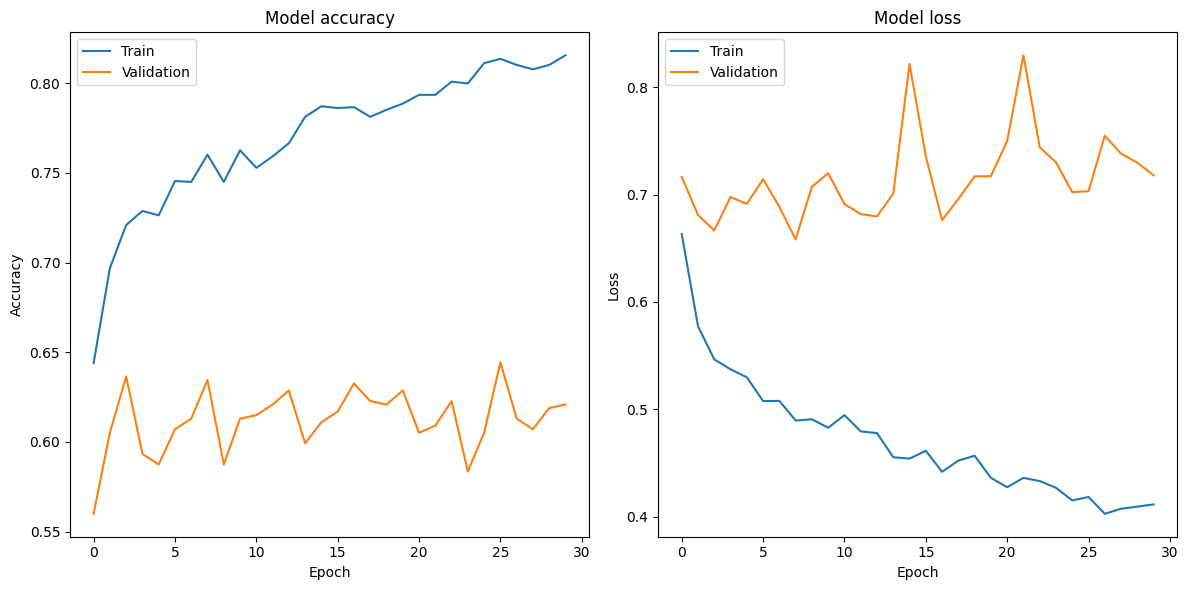

In [15]:
# Plot training & validation accuracy values

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Autistic Children Emotions/Test/fear/13.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Get the emotion label with the highest probability
emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Print the predicted emotion
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 1s 1s/step
The predicted emotion is: Surprise


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Predict test labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate classification report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')


13/13 [==============================] - 8s 562ms/step - loss: 0.8198 - accuracy: 0.8640
Test accuracy: 0.9240259647369385
13/13 [==============================] - 9s 674ms/step
Accuracy: 0.8657142857142857
Classification Report:
              precision    recall  f1-score   support

    autistic       0.92      0.89      0.91       150
non_autistic       0.84      0.88      0.86       158

    accuracy                           0.84       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.84      0.84      0.83       308

Confusion Matrix:
[[94 96]
 [87 91]]
F1 Score: 0.81631811487482
